# Forecasting in Energy consumption data set

We have build three forecasting models 
 - Energy forecasting
 - GHG volume(kg) saved forecasting
 - volume of gasoline saved forecasting 

In [ ]:
import keras
import sklearn
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, RNN

In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [2]:
def mean_by_frequency_of_row_and_time(data,frequency=5):
    data=data.reset_index()
    num=0
    date=[]
    average=[]
    sum=0
    mean=0
    while(num<len(data)):
        if(num==0):
            #calculating the mean
            for i in range(num,num+(frequency)):
                sum=sum+data.iloc[i]['Energy (kWh)']
            date.append(data.iloc[num]['Date'])
            average.append(sum/len(list(range(num,num+(frequency)))))
            num=num+frequency
        else:
            sum=0
            try:  
                for i in range(num,num+(frequency)):
                    sum=sum+data.iloc[i]['Energy (kWh)']
                date.append(data.iloc[num]['Date'])
                average.append(sum/len(list(range(num,num+frequency))))
                num=num+(frequency)
            except Exception:
                pass
                num=num+frequency
    return pd.DataFrame({"Date":date,"Average":average})

In [3]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


import numpy as np

#This function is used to show mean absolute parcentage error(MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
   y_true, y_pred = np.array(y_true), np.array(y_pred)
  
   return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


#This function is used plot the Mean Absolute Percentage Error.
def error_plot(y_true,y_pred):
  

   import numpy as np
   import matplotlib.pyplot as plt

   def mean_absolute_percentage_error(y_true, y_pred): 
       y_true, y_pred = np.array(y_true), np.array(y_pred)
       return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
   
   
   error_percentage=mean_absolute_percentage_error(y_true, y_pred)
   no_error_percentage=(100-error_percentage)
   
   #preparing the data for plotting.
   names=['error_percentage : '+str(error_percentage)+"%",'correct_percentage : '+str(no_error_percentage)+"%"]
   size=[error_percentage,no_error_percentage]
   
   # Create a circle for the center of the plot
   my_circle=plt.Circle( (0,0), 0.7, color='white')


   
   # Give color names
   plt.pie(size, labels=names, colors=['orange','blue'])
   p=plt.gcf()
   p.gca().add_artist(my_circle)
   plt.title("The Mean Absolute Percentage Error")
   plt.show()  

In [4]:
data=pd.read_csv("C:/Users/admin/Desktop/rohan/projects/EV/data_set/EVCS_consu/energy_consumption_clean_data.csv")

## Energy consumption forecasting

In [5]:
data['Date']=pd.to_datetime(data['Date'])

In [9]:
data_week_days=data[(data['week_days']== "Monday")|(data['week_days']=="Tuesday")|(data['week_days']=="Wednesday")|(data['week_days']=="Thursday")|(data['week_days']=="Friday")][["Date","Energy (kWh)"]]

In [7]:
data_week_end=data[(data['week_days']== "Saturday")|(data['week_days']=="Sunday")][["Date","Energy (kWh)"]]

In [ ]:
data1=data[['Date','Energy (kWh)']]
data1=data1.set_index('Date')

In [ ]:
data_week_days.to_csv("week_days.csv")

### LSTM

In [ ]:
#def row_count(data):
data_week_days

In [ ]:
zzz=data_week_days.set_index('Date')

In [11]:
week_average_data=mean_by_frequency_of_row_and_time(data_week_days,frequency=5)

In [12]:
week_average_data

,Date,Average
0,2018-01-01,17.8
1,2018-01-08,46.4
2,2018-01-15,41.2
3,2018-01-22,73.4
4,2018-01-29,71.2
5,2018-02-05,78.4
6,2018-02-12,88.6
7,2018-02-19,93.8
8,2018-02-26,70.4
9,2018-03-05,71.2


In [36]:
data1=week_average_data.set_index('Date')

In [37]:
train=data1[:53]
test=data1[53:]

In [38]:
test.tail()

,Average
Date,
2019-07-22,254.4
2019-07-29,264.0
2019-08-05,250.8
2019-08-12,282.2
2019-08-19,282.8


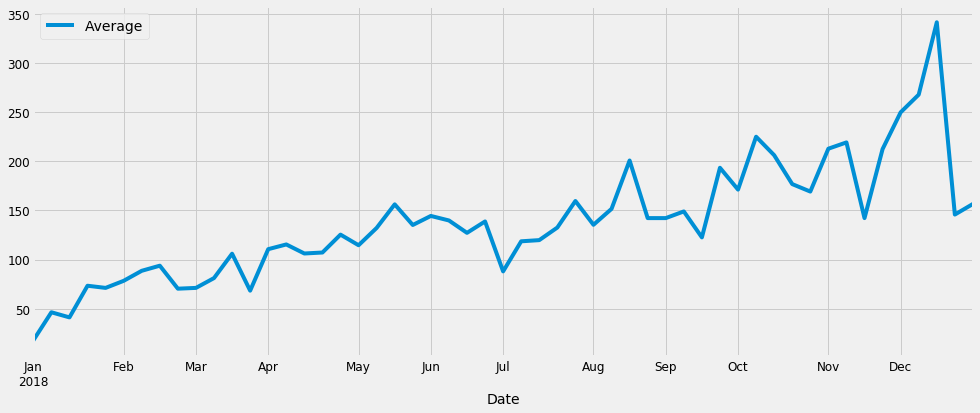

In [39]:
train.plot(figsize=(15, 6))
plt.show()

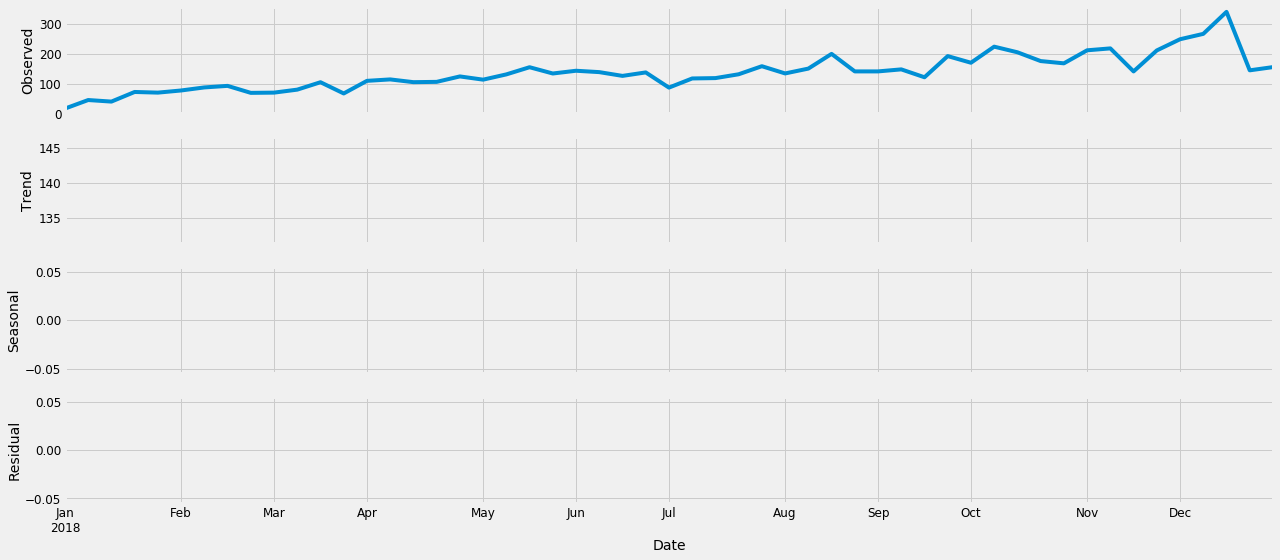

In [40]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(train, model='additive')
fig = decomposition.plot()
plt.show()

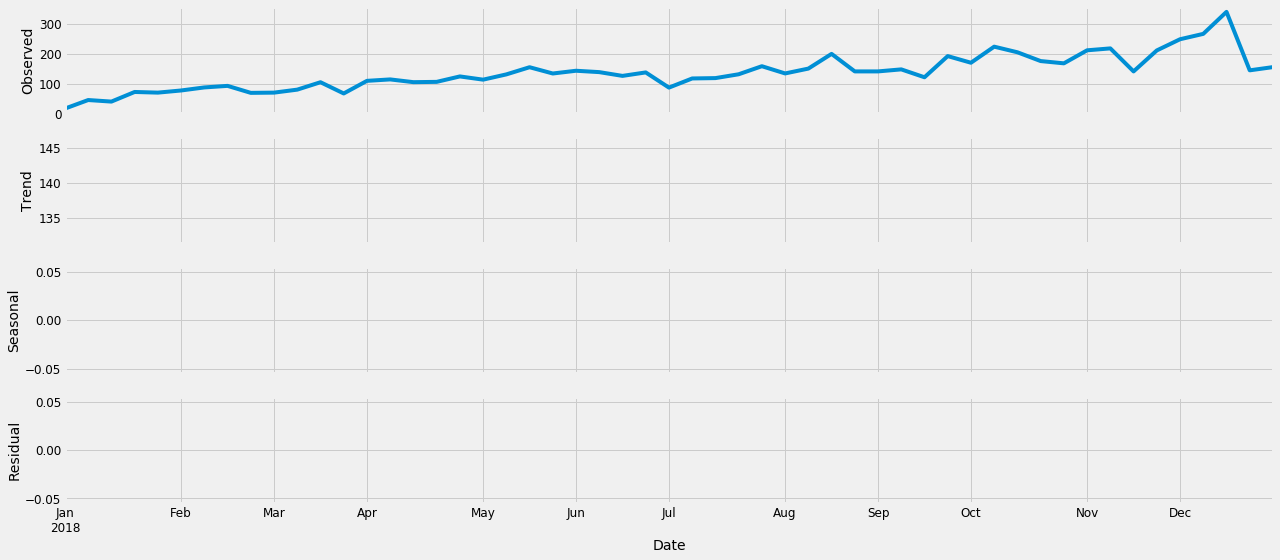

In [41]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(train, model='multiplicative')
fig = decomposition.plot()
plt.show()

In [42]:
X = train['Average'].values
result = adfuller(X)

print('Adf statistic: %f' % result[0])
print('p-value: %f'% result[1])

print('Critical Values:')
for key, value in result[4].items():
    print('\t %s:%.3f'%(key,value))
    
if result[0] < result[4]['5%']:
    print('Reject H0 - Time series is stationary')
else:
    print('Failed to Reject H0 - Time series is not Stationary')    

Adf statistic: 0.075119
p-value: 0.964321
Critical Values:
	 1%:-3.589
	 5%:-2.930
	 10%:-2.603
Failed to Reject H0 - Time series is not Stationary


In [43]:
#
tt=np.log(train["Average"])

In [44]:
X = tt.values
result = adfuller(X)

print('Adf statistic: %f' % result[0])
print('p-value: %f'% result[1])

print('Critical Values:')
for key, value in result[4].items():
    print('\t %s:%.3f'%(key,value))
    
if result[0] < result[4]['5%']:
    print('Reject H0 - Time series is stationary')
else:
    print('Failed to Reject H0 - Time series is not Stationary')

Adf statistic: -3.058070
p-value: 0.029816
Critical Values:
	 1%:-3.568
	 5%:-2.921
	 10%:-2.599
Reject H0 - Time series is stationary


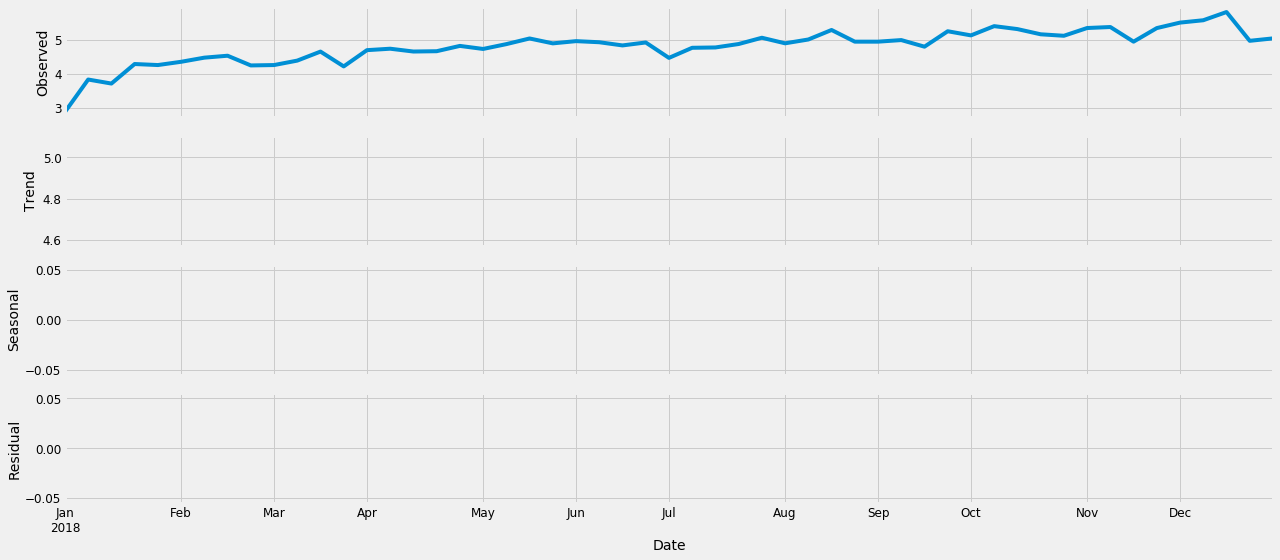

In [45]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(tt, model='additive')
fig = decomposition.plot()
plt.show()

# Forecasting on train data set

ACF and pacf plot in python

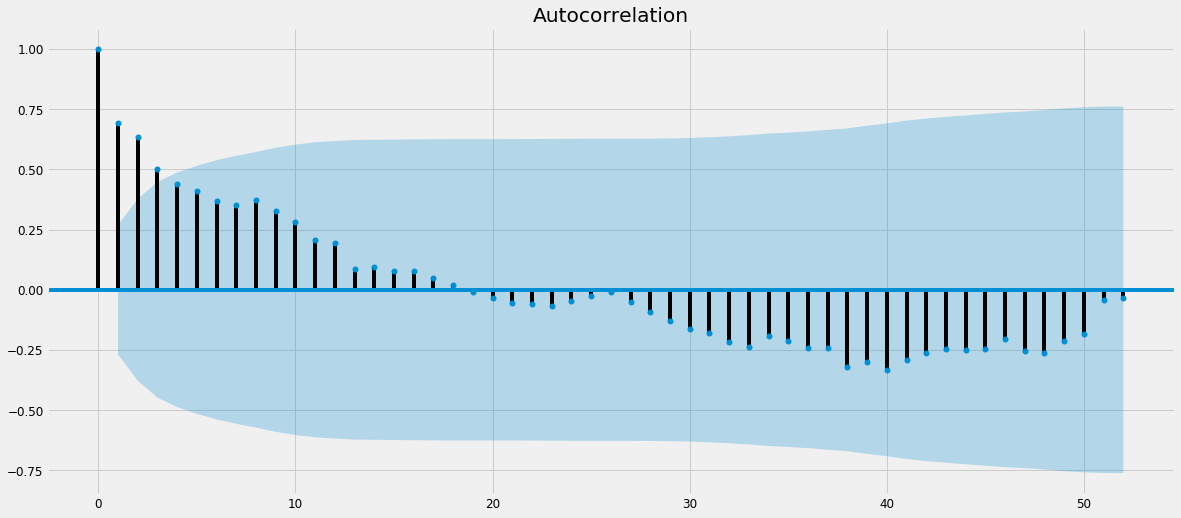

In [46]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(tt)
pyplot.show()

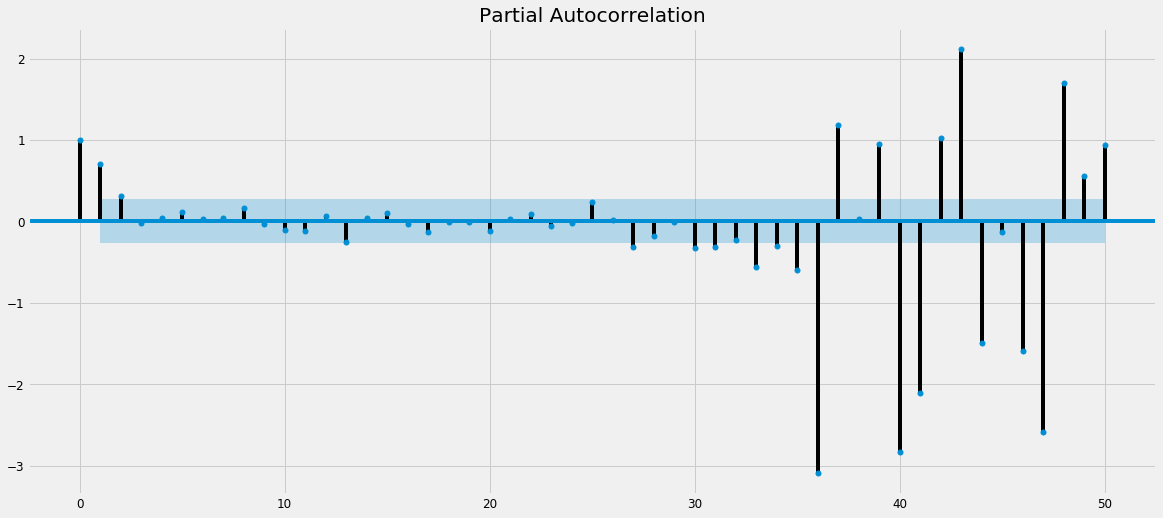

In [47]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(tt, lags=50)
pyplot.show()

In [48]:
import itertools
#finding best p d q values
p = d = q = range(0,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
import warnings
warnings.filterwarnings('ignore')


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(tt,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:714.5176697413175

In [49]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(tt,
                                order=(3,0,2),
                                seasonal_order=(1,3,0,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4101      0.000  -2189.967      0.000      -0.410      -0.410
ar.L2          0.3938      0.000   2996.162      0.000       0.394       0.394
ar.L3         -0.8677      0.000  -3002.831      0.000      -0.868      -0.867
ma.L1          0.8705   8.44e-08   1.03e+07      0.000       0.871       0.871
ma.L2          0.5001   5.05e-08    9.9e+06      0.000       0.500       0.500
ar.S.L12      -0.6837      0.000  -4553.145      0.000      -0.684      -0.683
sigma2      9.156e-08   9.25e-08      0.990      0.322   -8.97e-08    2.73e-07


In [84]:
q=np.exp(results.forecast()).reset_index()

In [85]:
#pd.set_option('display.width', 1000)
#q[0]
mean_absolute_percentage_error(test,q[0])

15.844170366027171

In [86]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(q[0],test))

print(rmse)

ValueError: Found input variables with inconsistent numbers of samples: [1, 33]

In [87]:
a=test.copy()
a=a.reset_index()
a.head()

,Date,Average
0,2019-01-07,240.2
1,2019-01-14,266.6
2,2019-01-21,242.4
3,2019-01-28,334.6
4,2019-02-04,269.2


In [88]:
data=pd.DataFrame()
data['a']=a['Average']
data['b']=q[0]
data.head()

,a,b
0,240.2,254.356917
1,266.6,NaN
2,242.4,NaN
3,334.6,NaN
4,269.2,NaN


In [89]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(data['b'],data['a']))

print(rmse)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# building arima on full data

In [103]:
oo=np.log(data1['Average'])

In [104]:
X = oo.values
result = adfuller(X)

print('Adf statistic: %f' % result[0])
print('p-value: %f'% result[1])

print('Critical Values:')
for key, value in result[4].items():
    print('\t %s:%.3f'%(key,value))
    
if result[0] < result[4]['5%']:
    print('Reject H0 - Time series is stationary')
else:
    print('Failed to Reject H0 - Time series is not Stationary')

Adf statistic: -2.660726
p-value: 0.081084
Critical Values:
	 1%:-3.518
	 5%:-2.900
	 10%:-2.587
Failed to Reject H0 - Time series is not Stationary


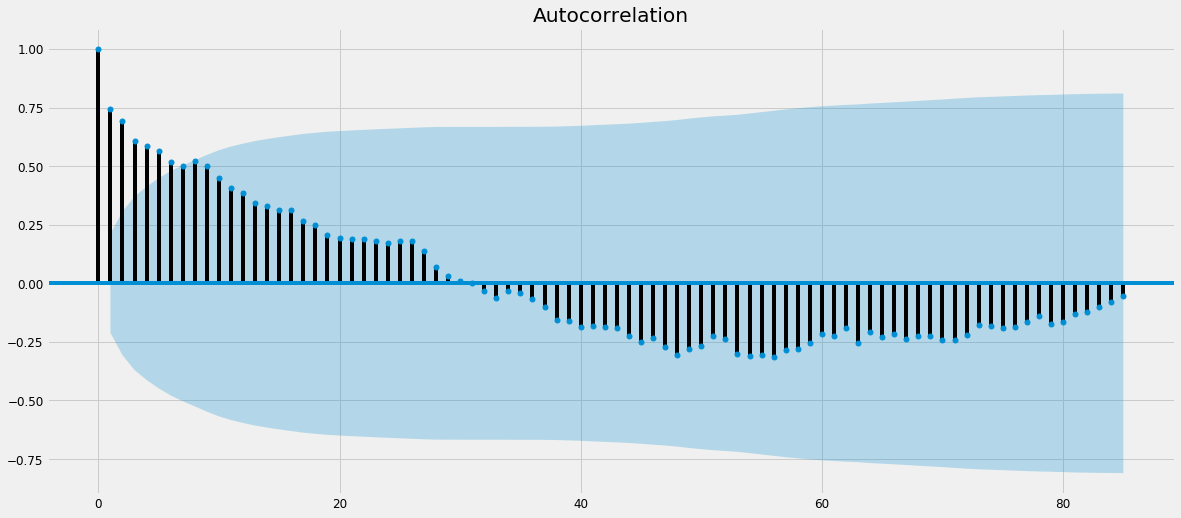

In [105]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(oo)
pyplot.show()

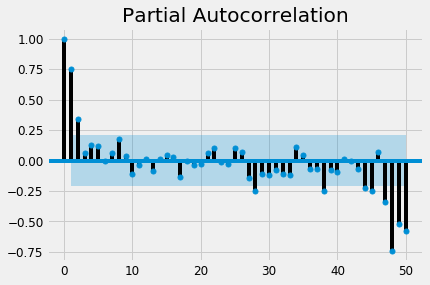

In [17]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(oo, lags=50)
pyplot.show()

In [106]:
import itertools
#finding best p d q values
p = d = q = range(0,6)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 0, 3, 12)
SARIMAX: (0, 0, 2) x (0, 0, 4, 12)


In [ ]:
import warnings
warnings.filterwarnings('ignore')


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(oo,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [107]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(oo,
                                order=(3,3,0),
                                seasonal_order=(5,1,0,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2131      0.061    -19.879      0.000      -1.333      -1.094
ar.L2         -0.7513      0.083     -9.081      0.000      -0.913      -0.589
ar.L3          0.0109      0.097      0.112      0.911      -0.180       0.202
ar.S.L12      -0.9168      0.122     -7.513      0.000      -1.156      -0.678
ar.S.L24      -1.6293      0.102    -16.006      0.000      -1.829      -1.430
ar.S.L36      -1.4831      0.064    -23.015      0.000      -1.609      -1.357
ar.S.L48      -1.8018      0.063    -28.779      0.000      -1.924      -1.679
ar.S.L60       0.3767      0.148      2.550      0.011       0.087       0.666
sigma2         0.0006      0.002      0.367      0.714      -0.002       0.004


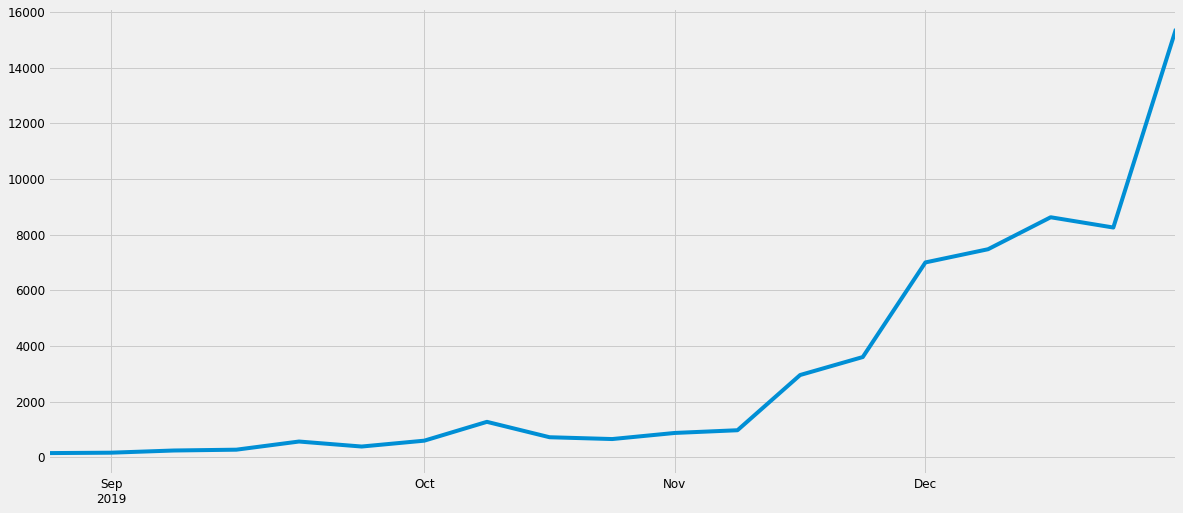

In [101]:
np.exp(results.forecast(steps=19)).plot()

In [111]:
def pos(x):
    if(x<0):
        x=0
        return x
    else:
        return x

In [113]:
pred = results.get_prediction(start ="2019-08-26",end="2019-12-30")
a=np.exp(pred.predicted_mean)
pred_ci = np.exp(pred.conf_int())
#pd.DataFrame()
pred_ci['forecasted_values']=np.exp(pred.predicted_mean)
pred_ci['lower Average']=pred_ci['lower Average'].apply(pos)
pred_ci.to_csv("week_days_forecasting1.csv")

In [99]:
data1.to_csv("full_data_week_days.csv")

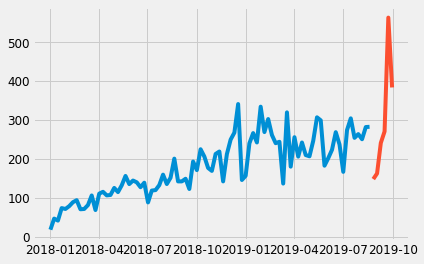

In [35]:
plt.plot(data1['Average'])
plt.plot(np.exp(results.forecast(steps=6)))

In [ ]:
results.forecast(steps=)

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
pred = results.get_prediction(start="2019-06-30",end="2019-09-01", dynamic=False)
pred_ci = pred.conf_int()
ax = data1.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Energy consumed(KWH)')
plt.ylim(0,3000)
plt.legend()
plt.show()

In [ ]:
pred = results.get_prediction(start='2019-06-30',end='2019-09-01')
#pred = results.get_prediction()
pred

In [ ]:
a=pred.predicted_mean
new = pd.DataFrame(a,columns=['predicted'])
new

In [ ]:
new['actual']=test

In [ ]:
#new
#y_forecasted=pred.predicted_mean
#y_true =df['2019-01-01':]
#a=y_true['demand']
#print(type(a))
#print(type(y_forecasted))
error_plot(new['actual'],new['predicted'])

In [ ]:
#RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(new['actual'],new['predicted']))
rms
mean_squared_error(new['actual'],new['predicted'])

In [ ]:
new

# Forecasting on full data

In [ ]:
import itertools
#finding best p d q values
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
import warnings
warnings.filterwarnings('ignore')


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(data1,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
results.forecast(steps=5)

In [ ]:
pred_uc = results.get_forecast(steps=20)
pred_ci = pred_uc.conf_int()
ax = data1.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Energy consumed(KwH)')
plt.legend()
plt.show()

In [ ]:
#Forecasting 
pred_uc = results.get_forecast(steps=8)

In [102]:
pred_uc.predicted_mean.reset_index()#to_csv("Energy_consumption_forecasting_values.csv")

NameError: name 'pred_uc' is not defined

In [ ]:
pred_uc.conf_int().reset_index()#to_csv("Energy_consumption_confidence interval_values.csv")

# Holt winter

In [ ]:
test

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train).fit()
pred = model.predict(start="2019-06-30", end="2019-09-01")
pred

In [ ]:
error_plot(test,pred)

In [ ]:
#RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

#rms = sqrt(mean_squared_error(new['actual'],new['predicted']))
#rms
mean_squared_error(test,pred)

The holt winter is giving slightly better accuracy than ARIMA model.
so use Holt Winter

In [ ]:
data

# Forecasting GHG saving(KG)

In [ ]:
data['Date']=pd.to_datetime(data['Date'])

data1=data[['Date','GHG savings (kg)']]
data1=data1.set_index('Date')

data1=data1['GHG savings (kg)'].resample('W').sum().reset_index()

data1=data1.set_index('Date')

train=data1[:77]
test=data1[77:]

In [ ]:
train.plot(figsize=(15, 6))
plt.show()

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(train, model='additive')
fig = decomposition.plot()
plt.show()

# Forecasting on train data

In [ ]:
import itertools
#finding best p d q values
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
import warnings
warnings.filterwarnings('ignore')


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(train,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

In [ ]:
results.forecast(steps=5)
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
pred = results.get_prediction(start="2019-06-30",end="2019-09-01", dynamic=False)
pred_ci = pred.conf_int()
ax = data1.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('GHG saving(KG)')
plt.ylim(0,3000)
plt.legend()
plt.show()

In [ ]:
test

In [ ]:
pred = results.get_prediction(start='2019-06-30',end='2019-09-01')
#pred = results.get_prediction()
pred

a=pred.predicted_mean
new = pd.DataFrame(a,columns=['predicted'])
new

new['actual']=test

In [ ]:
error_plot(new['actual'],new['predicted'])

In [ ]:
#RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(new['actual'],new['predicted']))
rms
mean_squared_error(new['actual'],new['predicted'])

# Forecasting by full data set

In [ ]:
#now we are forecasting for full data.

import itertools
#finding best p d q values
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
import warnings
warnings.filterwarnings('ignore')


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


In [ ]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(data1,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
results.forecast(steps=5)

pred_uc = results.get_forecast(steps=20)
pred_ci = pred_uc.conf_int()
ax = data1.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('GHG saving(KG)')
plt.legend()
plt.show()

In [ ]:
#Forecasting 
pred_uc.predicted_mean

# Holt winter

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train).fit()
pred = model.predict(start="2019-06-30", end="2019-09-01")
pred

In [ ]:
error_plot(test,pred)

In [ ]:
#RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

#rms = sqrt(mean_squared_error(new['actual'],new['predicted']))
#rms
mean_squared_error(test,pred)

# forecasting Gasoline Savings (gallons)

In [ ]:
data['Date']=pd.to_datetime(data['Date'])

data1=data[['Date','Gasoline Savings (gallons)']]
data1=data1.set_index('Date')

data1=data1['Gasoline Savings (gallons)'].resample('W').sum().reset_index()

data1=data1.set_index('Date')

train=data1[:77]
test=data1[77:]

In [ ]:
train

In [ ]:
train.plot(figsize=(15, 6))
plt.show()

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(train, model='additive')
fig = decomposition.plot()
plt.show()

# Forecasting on train data

In [ ]:
import itertools
#finding best p d q values
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


In [ ]:
import warnings
warnings.filterwarnings('ignore')


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(train,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

results.forecast(steps=5)
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
pred = results.get_prediction(start='2019-06-30',end='2019-09-01')
#pred = results.get_prediction()
pred

In [ ]:
a=pred.predicted_mean
new = pd.DataFrame(a,columns=['predicted'])
new

In [ ]:
new['actual']=test

error_plot(new['actual'],new['predicted'])

In [ ]:
#RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(new['actual'],new['predicted']))
rms
mean_squared_error(new['actual'],new['predicted'])


# forecasting on full data

In [ ]:
#now we are forecasting for full data.
import itertools
#finding best p d q values
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
import warnings
warnings.filterwarnings('ignore')


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


In [ ]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(data1,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
results.forecast(steps=5)


In [ ]:
pred_uc = results.get_forecast(steps=20)
pred_ci = pred_uc.conf_int()
ax = data1.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Gasoline Savings (gallons)')
plt.legend()
plt.show()

In [ ]:
#Forecasting 
pred_uc.predicted_mean

# Holt Winter

In [ ]:
# Holt winter

from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train).fit()
pred = model.predict(start="2019-06-30", end="2019-09-01")
pred

error_plot(test,pred)

In [ ]:
model=ExponentialSmoothing(zzz).fit()
model.forecast(steps=5)

In [ ]:
model=Holt(tt, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
q=np.exp(model.forecast(steps=33)).reset_index()

In [ ]:
error_plot(test['Average'],q[0])

In [ ]:
#RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

#rms = sqrt(mean_squared_error(new['actual'],new['predicted']))
#rms
mean_squared_error(test['Average'],q[0])

forecasting for full data

In [ ]:
aa=data1['Average'].reset_index()

In [ ]:
model=Holt(aa, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
dd=model.forecast(steps=20).reset_index()

In [ ]:
pp=pd.concat([aa,dd]).reset_index()
gg=pp.drop("index",axis=1)
gg.plot()

In [ ]:
pred_uc = model.forecast(steps=6)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(zzz).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.2$')
# plot
fcast1.plot(marker='o', color='blue', legend=True)
fit1.fittedvalues.plot(marker='o',  color='blue')



fit2 = SimpleExpSmoothing(zzz).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(12).rename(r'$\alpha=0.6$')
# plot
fcast2.plot(marker='o', color='red', legend=True)
fit2.fittedvalues.plot(marker='o', color='red')


fit3 = SimpleExpSmoothing(zzz).fit()
fcast3 = fit3.forecast(12).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
# plot
fcast3.plot(marker='o', color='green', legend=True)
fit3.fittedvalues.plot(marker='o', color='green')

plt.show()

In [ ]:
fit1 = Holt(zzz).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(12).rename("Holt's linear trend")

fit2 = Holt(zzz, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast2 = fit2.forecast(12).rename("Exponential trend")

fit3 = Holt(zzz, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(12).rename("Additive damped trend")


fit1.fittedvalues.plot(marker="o", color='blue')
fcast1.plot(color='blue', marker="o", legend=True)
fit2.fittedvalues.plot(marker="o", color='red')
fcast2.plot(color='red', marker="o", legend=True)
fit3.fittedvalues.plot(marker="o", color='green')
fcast3.plot(color='green', marker="o", legend=True)

plt.show()